In [1]:
import numpy as np
import pickle
import os
import h5py
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
rootPath = '/home/cschellenberger/Documents/scripts/models/thesis/'

In [7]:
def getLayerSize(weight_file_path):
    f = h5py.File(weight_file_path)
    dec, enc = [], []
    try:
        for layer, g in f.items():
            for name, d in g.items(): 
                if str(f.filename).endswith('.h5'):
                    for k, v in d.items():
                        if 'kernel' in k: dec.append(np.array(v).shape[4]) if 'dec' in name else enc.append(np.array(v).shape[4])
    finally:
        f.close()
    dec.sort(reverse=True)
    return [enc[1:], dec]

for folder in os.listdir('/home/cschellenberger/Documents/scripts/models/thesis/'):
    print(folder)
    if 'dep' in folder: continue
    for path in os.listdir('/home/cschellenberger/Documents/scripts/models/thesis/' + folder + '/'):
        if 'Results' in path: continue
        dists = pickle.load(open('/home/cschellenberger/Documents/scripts/models/thesis/' + folder + '/Results/' + path + '.p', "rb"))
        print(path)
        print(getLayerSize('/home/cschellenberger/Documents/scripts/models/thesis/' + folder + '/' + path + '/bestWeights.h5'))
        print(np.array(list(dists.values())).mean() * 1.8)

Regularization
newT3_best_localmi_reg001_08_1000_st43_lr3e-05_bat1
[[16, 32, 32, 32], [32, 32, 32, 32, 32, 16, 16]]
6.413115038459174
l20_001500_st10_lr0_001_bat4
[[16, 32, 32, 32], [32, 32, 32, 32, 32, 16, 16]]
12.587369530289315
localmi_newT3_reg001_03_1000_st43_lr5e-05_bat1
[[16, 32, 32, 32], [32, 32, 32, 32, 32, 16, 16]]
14.584279515344592
l20_0031000_st10_lr0_0005_bat4
[[16, 32, 32, 32], [32, 32, 32, 32, 32, 16, 16]]
16.090695848915
l1l2011000_st24_lr0_0002_bat4
[[16, 32, 32, 32], [32, 32, 32, 32, 32, 16, 16]]
17.26033495442
Networksize
smallres1global1000_st10_lr1e-05_bat4
[[16, 32, 32, 32], [32, 32, 32, 32, 16, 16]]
8.282043631053824
intsteps4_secondTrain_1000_st10_lr5e-06_bat4
[[16, 16, 32, 32], [32, 32, 32, 16, 16]]
9.169903357081953
best_sofar
[[16, 32, 32, 32], [32, 32, 32, 16, 16]]
8.56546775758406
intsteps4_big_1000_st10_lr3e-05_bat4
[[16, 32, 32, 32], [32, 32, 32, 32, 32, 16, 16]]
15.129794670476311
smallres11000_st10_lr5e-05_bat4
[[32, 32, 32], [32, 32, 16]]
15.447504568

FileNotFoundError: [Errno 2] No such file or directory: '/home/cschellenberger/Documents/scripts/models/thesis/Learningrate/Results/localmi_newT3_reg001_03_1000_st14_lr0_01_bat3.p'

In [3]:
def showPlot(data, figsize):
    sns.set_style("darkgrid")
    sns.set(rc={'figure.figsize': figsize})
    colors = sns.color_palette("inferno")[2:]
    colors.append((0.991173, 0.859135, 0.356863))
    colors.append((0.991173, 0.959135, 0.356863))
    ax = sns.boxplot(data = data * 1.8, orient='h', width = 0.7, palette=colors)
    ax.set_xlim(4,21)
    ax.set_xticks([x for x in range(4,21)])
    ax.set_xticklabels([x if x % 2 == 0 else ""  for x in range(4,21)])
    ax.set_xlabel('Distance in mm')

In [4]:
def getPickle(folder, model):
    path = rootPath + folder + '/Results/'
    return pickle.load(open(path + model + '.p', "rb"))

In [7]:
def createDf(folder, models):
    preReg = pickle.load(open("./preReg.p", "rb"))
    resDict = {modelName: getPickle(folder, model) for modelName, model in zip(models.keys(), models.values())}
    df = pd.DataFrame()
    df['Pre Registration'] = preReg.values()
    for i in range(len(resDict)): df[list(resDict.keys())[i]] = list(resDict.values())[i].values()
    return df

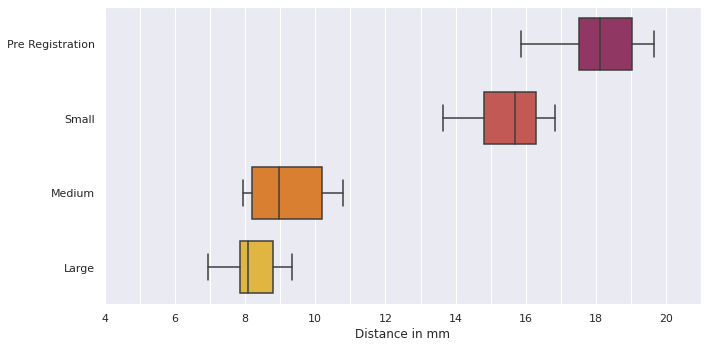

In [8]:
# Networksize
#[[16, 32, 32, 32], [32, 32, 32, 32, 16, 16]] smallres1global1000_st10_lr1e-05_bat4
#[[16, 16, 32, 32], [32, 32, 32, 16, 16]] intsteps4_secondTrain_1000_st10_lr5e-06_bat4
#[[32, 32, 32], [32, 32, 16]] smallres11000_st10_lr5e-05_bat4
downsampleDf = createDf('Networksize', {'Small': 'smallres11000_st10_lr5e-05_bat4', 'Medium' : 'intsteps4_secondTrain_1000_st10_lr5e-06_bat4', 'Large' : 'smallres1global1000_st10_lr1e-05_bat4'})
showPlot(downsampleDf, (10, 5))
plt.tight_layout()
plt.savefig('../Diagramme/Networksize.jpg')

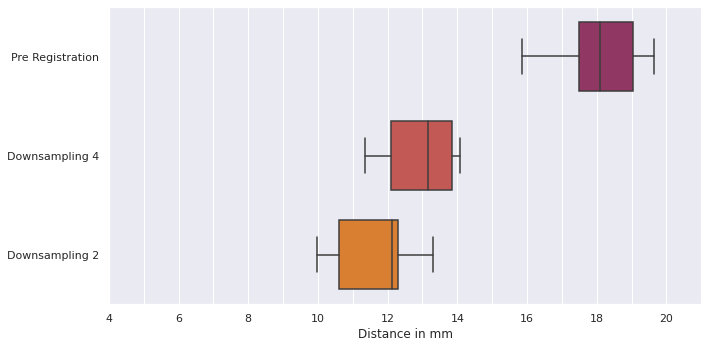

In [12]:
# Downsample
downsampleDf = createDf('Downsample', {'Downsampling 4' : '4CTCTDownsize4500_st10_lr0_001_bat4', 'Downsampling 2': '2Upscale250_st11_lr0_001_bat4'})
showPlot(downsampleDf, (10, 5))
plt.tight_layout()
plt.savefig('../Diagramme/Downsample.jpg')

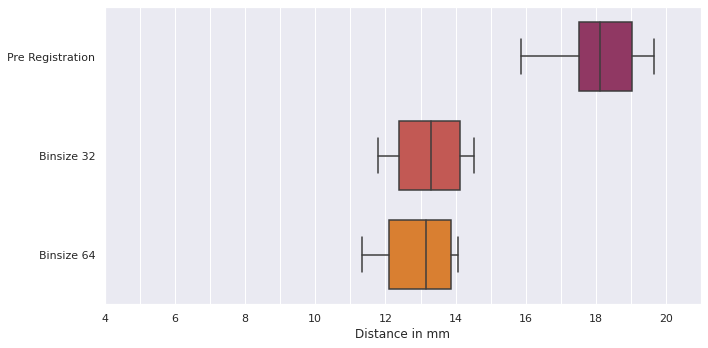

In [15]:
# Binsize
downsampleDf = createDf('BinSize', {'Binsize 32': '4CTCTDownsize4Bin64Ep500_st10_lr0_001_bat4', 'Binsize 64' : '4CTCTDownsize4500_st10_lr0_001_bat4'})
showPlot(downsampleDf, (10, 5))
plt.tight_layout()
plt.savefig('../Diagramme/Binsize.jpg')

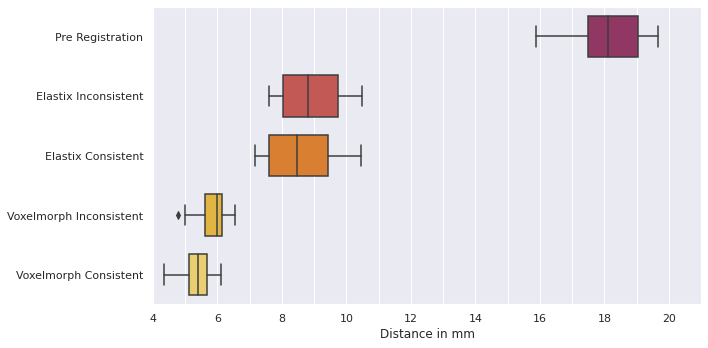

In [11]:
# Old vs New
downsampleDf = createDf('old vs new', {'Elastix Inconsistent': 'GridSpacing60',  'Elastix Consistent': 'GridSpacing60NewT3', 'Voxelmorph Inconsistent' : 'voxelmorphOldT3', 'Voxelmorph Consistent': 'voxelmorphNewT3'})
showPlot(downsampleDf, (10, 5))
plt.tight_layout()
plt.savefig('../Diagramme/Old vs New.jpg')

In [9]:
def getColor(i, j, cols, df):
    if j == 12: return False
    if cols[j, i] == df[df.columns[i]].min() or cols[j, i] == df[df.columns[i]].max(): return False 
    return True

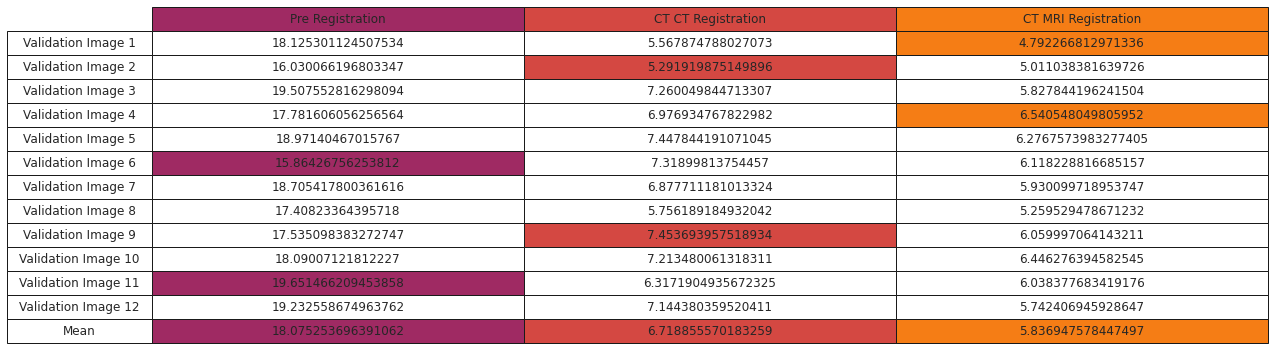

In [34]:
fig, ax = plt.subplots()
fig.patch.set_visible(False)
ax.axis('off')
ax.axis('tight')
colors = sns.color_palette("inferno")[2:]
colors.append((0.991173, 0.859135, 0.356863))
colors.append((0.991173, 0.959135, 0.356863))
cols = downsampleDf.values
cols = np.append(cols, [[downsampleDf[x].mean() for x in downsampleDf.columns]], axis = 0)
table = ax.table(cellText=cols * 1.8, colLabels=downsampleDf.columns, loc='center', cellLoc='center', rowLoc='center', colColours=colors, 
                    rowLabels = [f'Validation Image {x}' if x != 13 else 'Mean' for x in range(1, 14)], 
                    cellColours=[[(1,1,1) if getColor(i, j, cols, downsampleDf) else colors[i] for i in range(3)] for j in range(13)])
table.scale(2,2)
#fig.tight_layout()
plt.savefig('../Diagramme/LucavsNewTable.jpg', bbox_inches='tight')
plt.show()

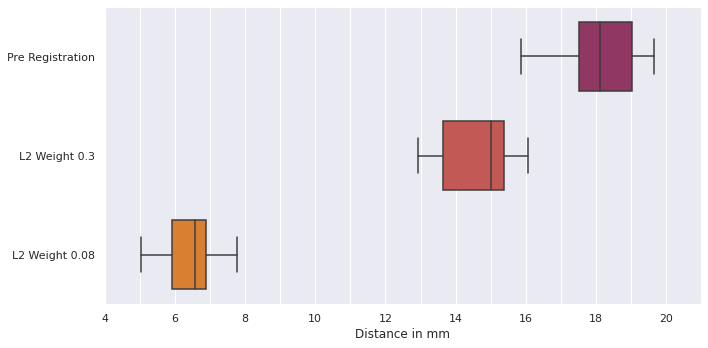

In [17]:
# Regularization Displacement Field
downsampleDf = createDf('Regularization', {'L2 Weight 0.3': 'localmi_newT3_reg001_03_1000_st43_lr5e-05_bat1', 'L2 Weight 0.08' : 'newT3_best_localmi_reg001_08_1000_st43_lr3e-05_bat1'})
showPlot(downsampleDf, (10, 5))
plt.tight_layout()
plt.savefig('../Diagramme/Regularization Displacement Field.jpg')

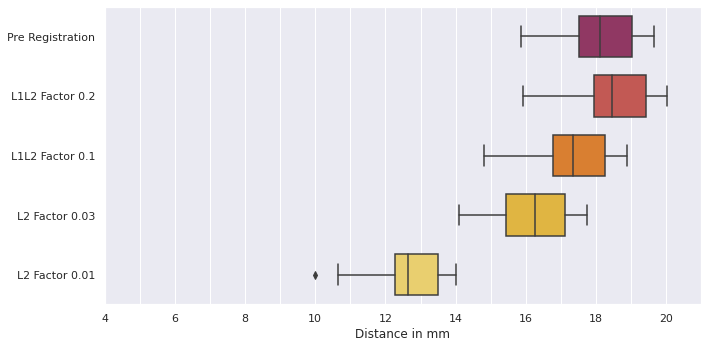

In [19]:
# Regularization Kernel
downsampleDf = createDf('Regularization', {'L1L2 Factor 0.2': 'l1l2021000_st24_lr0_0005_bat4', 'L1L2 Factor 0.1' : 'l1l2011000_st24_lr0_0002_bat4', 'L2 Factor 0.03' : 'l20_0031000_st10_lr0_0005_bat4', 'L2 Factor 0.01' : 'l20_001500_st10_lr0_001_bat4'})
showPlot(downsampleDf, (10, 5))
plt.tight_layout()
plt.savefig('../Diagramme/Regularization Kernel.jpg')

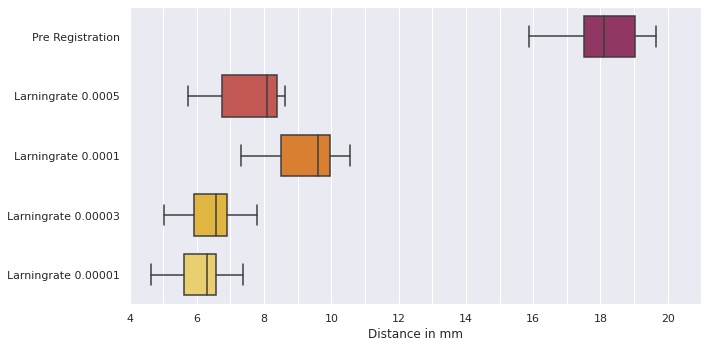

In [21]:
# Learningrate
downsampleDf = createDf('Learningrate', {'Larningrate 0.0005': 'localmi_secondTrain_intsteps3_reg002_1000_st14_lr0_0005_bat3', 'Larningrate 0.0001': 'localmi_newT3_reg001_03_1000_st14_lr0_0001_bat3', 'Larningrate 0.00003': 'newT3_best_localmi_reg001_08_1000_st43_lr3e-05_bat1', 'Larningrate 0.00001': 'localmi_newT3v2_reg001_08_1000_st43_lr1e-05_bat1'})
showPlot(downsampleDf, (10, 5))
plt.tight_layout()
plt.savefig('../Diagramme/Learningrate.jpg')

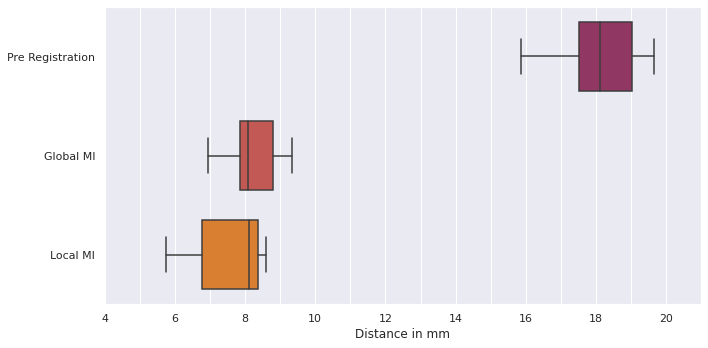

In [24]:
# Local vs Global
downsampleDf = createDf('Local vs Global', {'Global MI': 'smallres1global1000_st10_lr1e-05_bat4', 'Local MI' : 'localmi_secondTrain_intsteps3_reg002_1000_st14_lr0_0005_bat3'})
showPlot(downsampleDf, (10, 5))
plt.tight_layout()
plt.savefig('../Diagramme/Local vs Global.jpg')

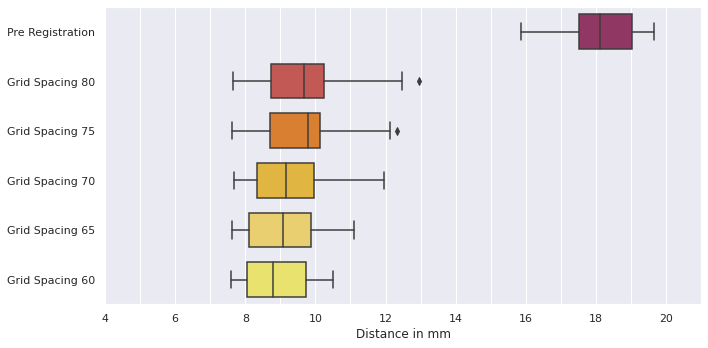

In [27]:
# Elastix
downsampleDf = createDf('Elastix', {'Grid Spacing 80': 'GridSpacing80', 'Grid Spacing 75' : 'GridSpacing75', 'Grid Spacing 70' : 'GridSpacing70', 'Grid Spacing 65' : 'GridSpacing65', 'Grid Spacing 60' : 'GridSpacing60'})
showPlot(downsampleDf, (10, 5))
plt.tight_layout()
plt.savefig('../Diagramme/Elastix.jpg')

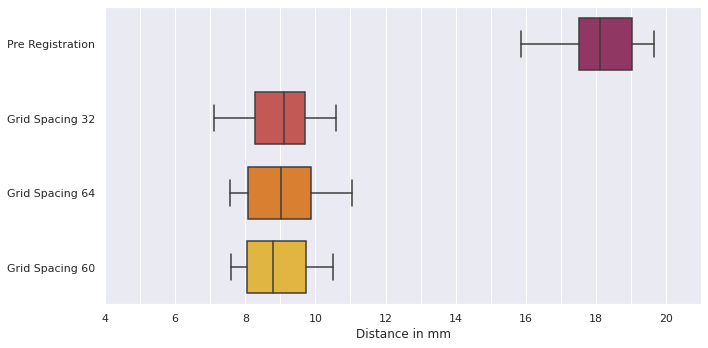

In [29]:
# Elastix
downsampleDf = createDf('Elastix', {'Grid Spacing 32': 'GridSpacing32', 'Grid Spacing 64' : 'GridSpacing64', 'Grid Spacing 60' : 'GridSpacing60'})
showPlot(downsampleDf, (10, 5))
plt.tight_layout()
plt.savefig('../Diagramme/Elastix3264.jpg')

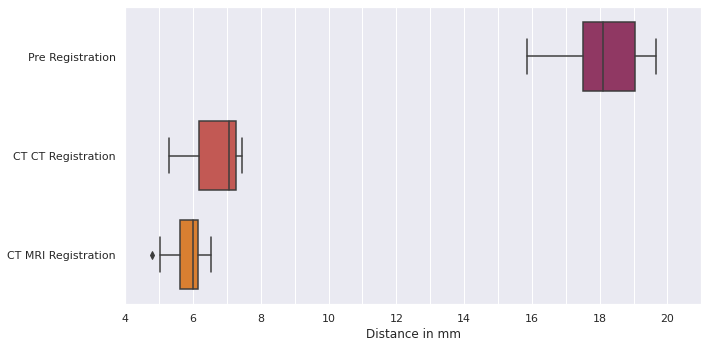

In [33]:
# Elastix vs Voxelmorph
downsampleDf = createDf('Luca', {'CT CT Registration': 'CTResults', 'CT MRI Registration' : 'voxelmorphOldT3'})
showPlot(downsampleDf, (10, 5))
plt.tight_layout()
plt.savefig('../Diagramme/LucavsNew.jpg')